In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Create Sudoku puzzle
puzzle = np.asarray(
    [
		[7, 8, 0, 4, 0, 0, 1, 2, 0],
		[6, 0, 0, 0, 7, 5, 0, 0, 9],
		[0, 0, 0, 6, 0, 1, 0, 7, 8],
		[0, 0, 7, 0, 4, 0, 2, 6, 0],
		[0, 0, 1, 0, 5, 0, 9, 3, 0],
		[9, 0, 4, 0, 6, 0, 0, 0, 5],
		[0, 7, 0, 3, 0, 0, 0, 1, 2],
		[1, 2, 0, 0, 0, 7, 4, 0, 0],
		[0, 4, 9, 2, 0, 6, 0, 0, 7]
	]
)

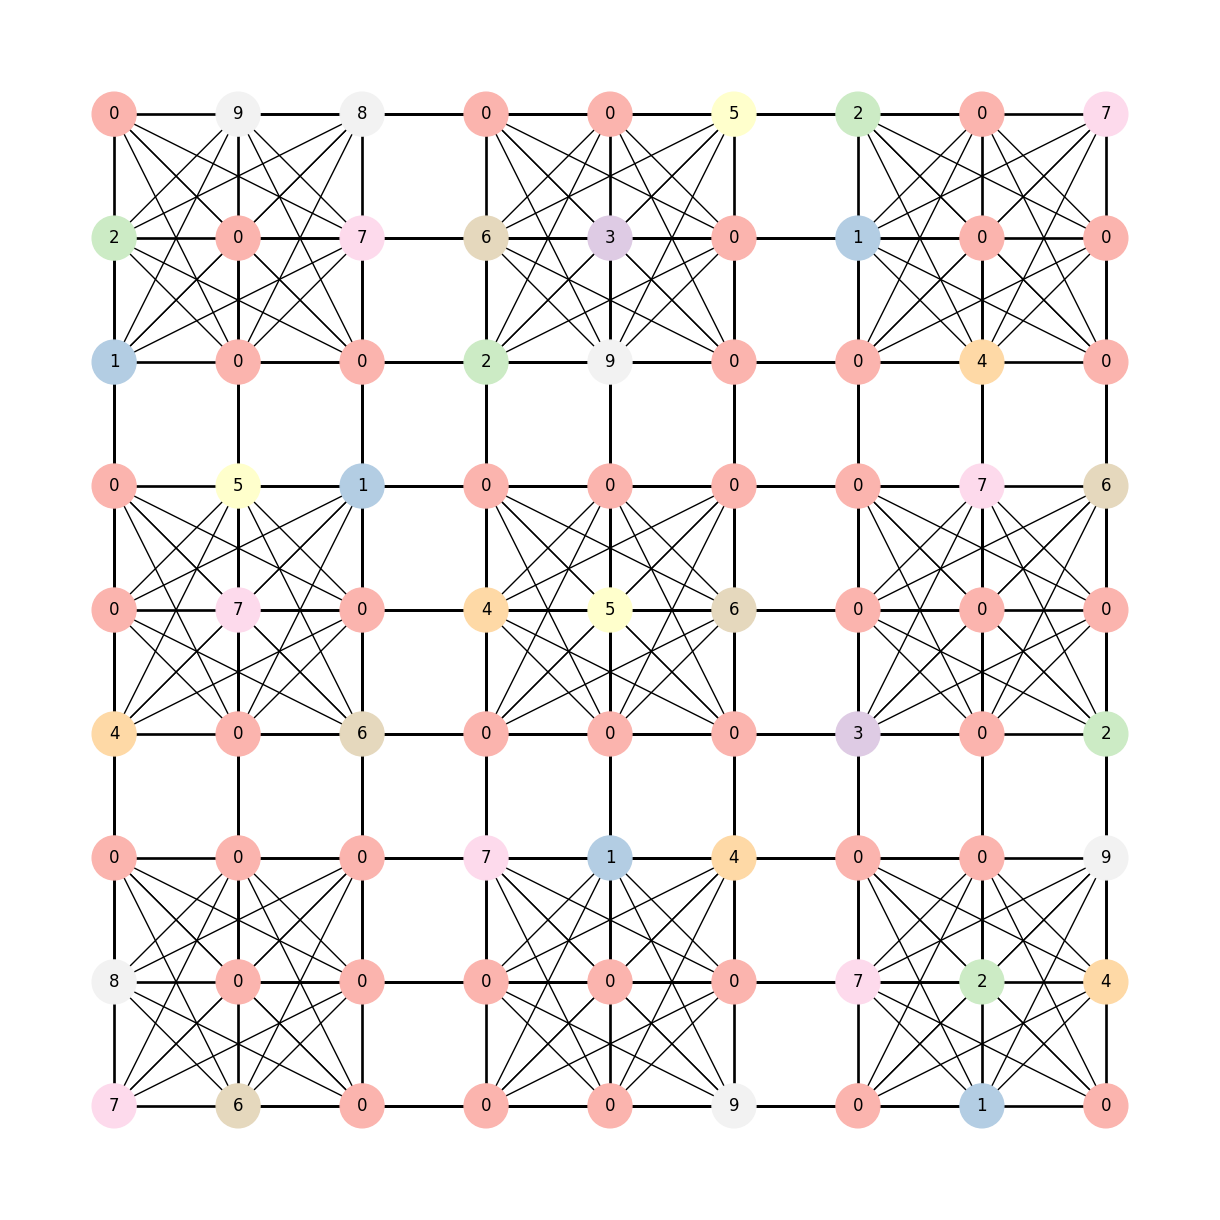

In [3]:
n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# we map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()